(50000, 32, 32, 3)
(10000, 32, 32, 3)


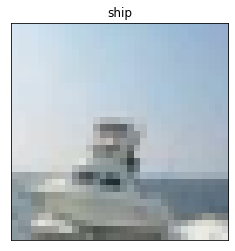

min and max value in image:  30 242


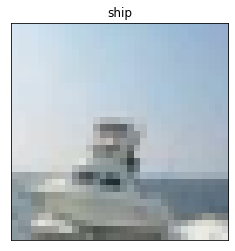

min and max value in image:  0.11764706 0.9490196


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# helper functions
def show_min_max(array, i):
  random_image = array[i]
  print("min and max value in image: ", random_image.min(), random_image.max())


def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(label_names[labels[i]])
  plt.xticks([])
  plt.yticks([])
  plt.show()


img_rows, img_cols = 32, 32  

num_classes = 10 

label_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data() 
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = cifar10.load_data() 

train_labels_backup = [item for sublist in train_labels_backup for item in sublist]
test_labels_backup = [item for sublist in test_labels_backup for item in sublist]
#print(train_labels_backup)

print(train_images.shape) 
print(test_images.shape) 

train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 3)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

plot_image(train_images, 100, train_labels_backup)
show_min_max(train_images, 100)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

plot_image(train_images, 100, train_labels_backup)
show_min_max(train_images, 100)

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [9]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization 

epochs = 15
batch_size = 64
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(rate=0.2)) 
model.add(BatchNormalization()) 

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(1, 1))) 
model.add(Dropout(rate=0.3)) 
model.add(BatchNormalization()) 

model.add(Conv2D(filters=128, kernel_size=(3, 3),activation='relu')) 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(1, 1))) 
model.add(Dropout(rate=0.3)) 
model.add(BatchNormalization()) 

model.add(Flatten()) 
model.add(Dense(units=128, activation='relu')) 
model.add(Dense(units=num_classes, activation='softmax')) 

model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy']) 
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images, test_labels), shuffle=True) 
scores = model.evaluate(test_images, test_labels,verbose=0) 
print('Test accuracy:', scores[1])  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        3

In [10]:
model.save("CIFAR10_imagerecognition.h5")